In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# the output of plotting commands is displayed inline within Jupyter

In [2]:
#Importing the dataset
data = pd.read_csv("advertising.csv")
data.head() #displaying 1st 5 data rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Linear Regression

## Linear Regression in 1 variable

### 1. TV Sales Analysis - minimizing Cost Function using Gradient Descent

Here we will try to estimate the sales with respect to the advertisement on TV, using userdefined functions that computes Cost Function and Gradient descent.

In [3]:
#Initializing the variables
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

Text(0, 0.5, 'Sales (in $100)')

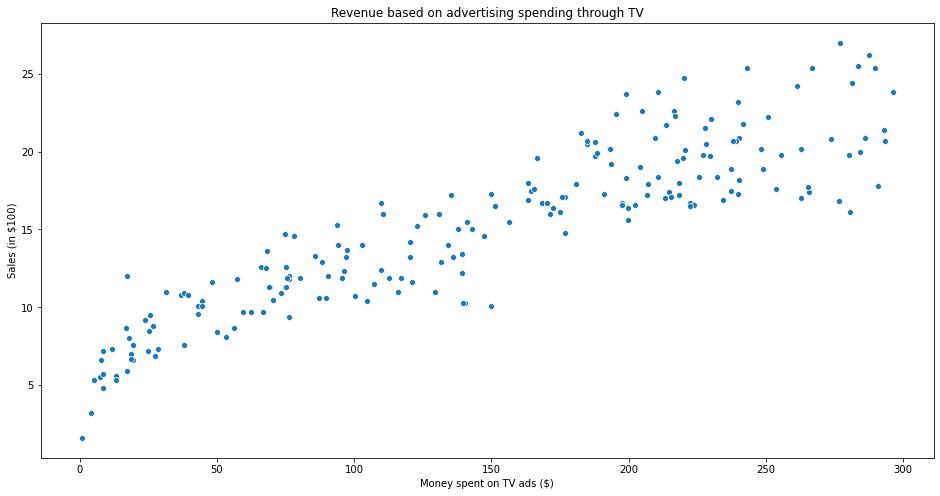

In [4]:
#Visualizing the data
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x='TV', y='Sales', data=data)
ax.set_title("Revenue based on advertising spending through TV");
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales (in $100)")

In [5]:
#Compute the Cost  𝐽(𝜃) 
def cost_function(X, y, theta):
    m = len(y)
    h_theta = X.dot(theta)
    error = (h_theta - y) ** 2
    return (1 / (2 * m)) * np.sum(error)

In [6]:
# mean and maximum values of TV coulm was found to perform feature scaling
# it was observed that model worked best when X value was divided by maximum value
max_val=X.max()
print(max_val)
mean_x=X.mean(axis=0, keepdims=True)
print(mean_x)

296.4
[[147.0425]]


In [7]:
# m = number of entries in .csv files
m = data.Sales.values.size
x_mean=mean_x[0][0]
X = np.append(np.ones((m, 1)), data.TV.values.reshape(m, 1)/max_val, axis=1)
y = data.Sales.values.reshape(m, 1)

# Assuming theta as an array of 0s of dimension 2x1
theta = np.ones((2,1))

cost_function(X, y, theta)
# cost calculated before performing gradient descent = 105.5  

105.50778780533975

In [8]:
#Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        h_theta = X.dot(theta)
        error = np.dot(X.transpose(), (h_theta - y))
        theta -= alpha * (1/m) * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
# alpha is the step size, the magnitude by which algo descends 
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = 9.6 + 11.5x1


In [10]:
costs[499] # iterations=500

4.610891536884106

In [11]:
costs[999] # iterations=1000

3.642509743198044

In [14]:
#Visualising the Cost Function 𝐽(𝜃)
from mpl_toolkits.mplot3d import Axes3D

In [15]:
theta_0 = np.linspace(-100,100,200)
theta_1 = np.linspace(-100,100,200)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

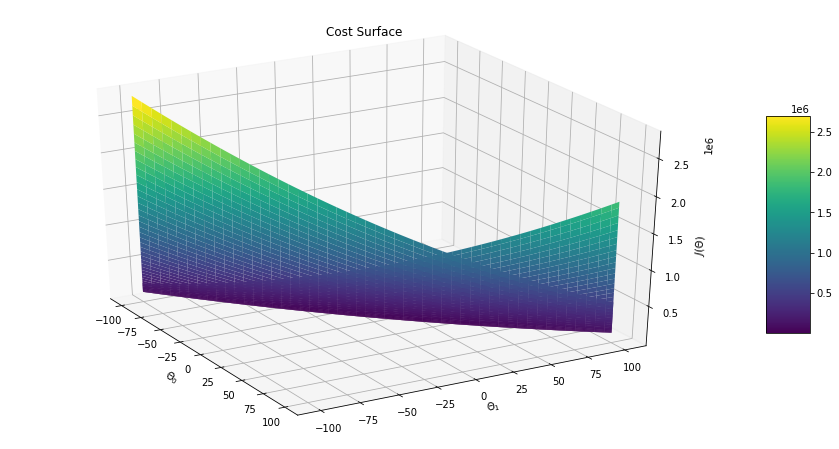

In [16]:
fig = plt.figure(figsize = (16, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

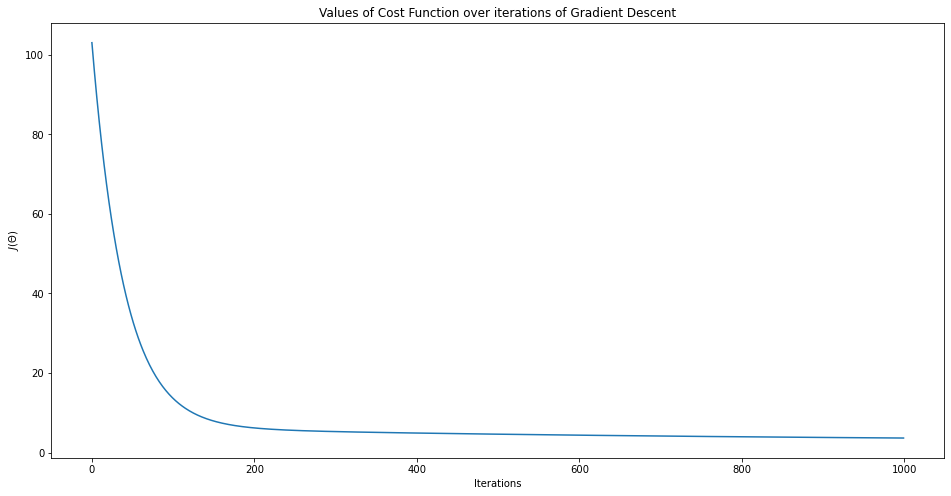

In [17]:
# Plotting the Convergence
plt.figure(figsize=(16, 8))
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

In [12]:
# Training Data with Linear Regression Fit
theta.shape

(2, 1)

In [13]:
theta

array([[ 9.59885094],
       [11.4997783 ]])

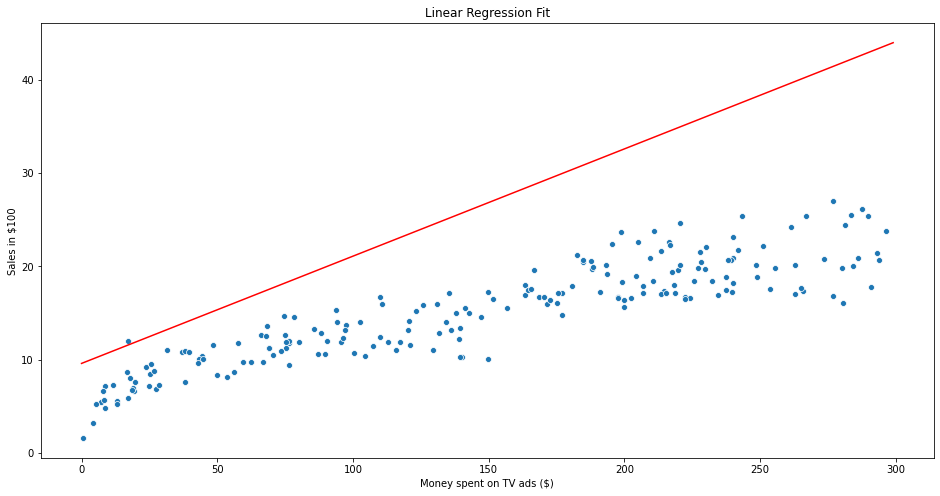

In [61]:
# changing theta from an array of 2x1 to 1x2
theta = np.squeeze(theta)
plt.figure(figsize=(16, 8))
sns.scatterplot(x = "TV", y= "Sales", data = data)
theta[1]=theta[1]/100
x_value=[x for x in range(0, 300)]
y_value=[(theta[0] + x * theta[1]) for x in x_value]


sns.lineplot(x_value,y_value, color="r")
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales in $100")
plt.title("Linear Regression Fit");

In [62]:
# Predicting Sales by inputting values for expenditure on TV advertisment
TV_expen=float(input("Enter amount you want to invest: "))
revenue=(theta[0] + TV_expen * theta[1])*100 #since the sales is in $100s
print("You will get a sales of ${:.2f}".format(revenue))

Enter amount you want to invest: 200
You will get a sales of $3259.84


In [63]:
# Error in prediction
# From the data set at X[50]=199.8 y[50]=1640
y_pred = theta[0]+theta[1]*200
y_org=y[50]
error = abs(y_pred-y_org)*100/y_org
er=error[0]
print("% Error in prediction {:.2f}".format(er),"%")

% Error in prediction 98.77 %


### 2. TV Sales Analysis Normal Equation 

Here we are using Normal equation to find out the coeffient values of hypothesis function.

In [24]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
X = np.append(np.ones((m, 1)), data.TV.values.reshape(m, 1), axis=1)
y = data.Sales.values.reshape(m, 1)

array([6.97482149, 0.05546477])

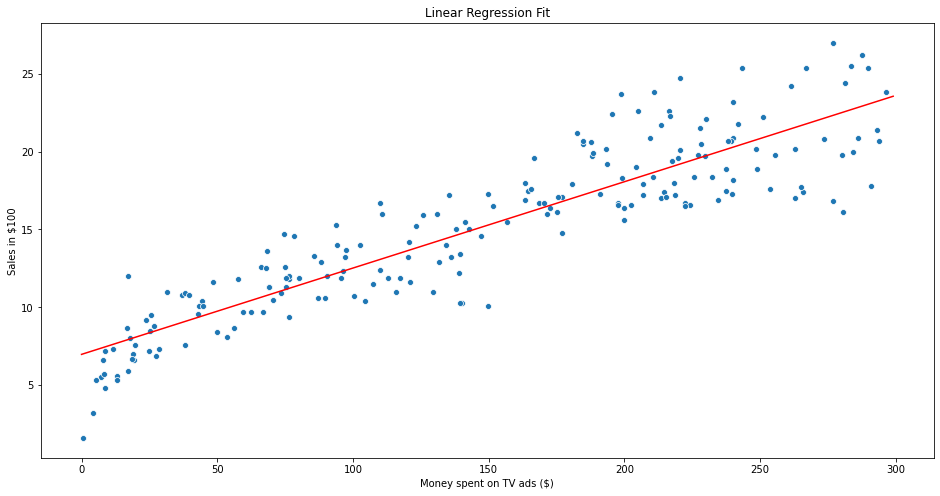

In [25]:
theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

theta = np.squeeze(theta)
plt.figure(figsize=(16, 8))
sns.scatterplot(x = "TV", y= "Sales", data = data)
x_value=[x for x in range(0, 300)]
y_value=[(theta[0] + x * theta[1]) for x in x_value]

sns.lineplot(x_value,y_value, color="r")
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales in $100")
plt.title("Linear Regression Fit");
theta

In [26]:
# Predicting Sales by inputting values for expenditure on TV advertisment
TV_expen=float(input("Enter amount you want to invest: "))
revenue=(theta[0] + TV_expen * theta[1])*100 #since the sales is in $100s
print("You will get a sales of ${:.2f}".format(revenue))

Enter amount you want to invest: 200
You will get a sales of $1806.78


In [45]:
# Error in prediction
# From the data set at X[50]=199.8 y[50]=1640
y_pred = theta[0]+theta[1]*200
y_org=y[50]
error = abs(y_pred-y_org)*100/y_org
er=error[0]
print("% Error in prediction {:.2f}".format(er),"%")

% Error in prediction 10.17 %


### 3. TV Sales Analysis - using predefinded model

Here we will try to estimate the sales with respect to the advertisement on TV, using LinearRegression model from Scikit Learn Library. This is Ordinary least squares Model.

In [48]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

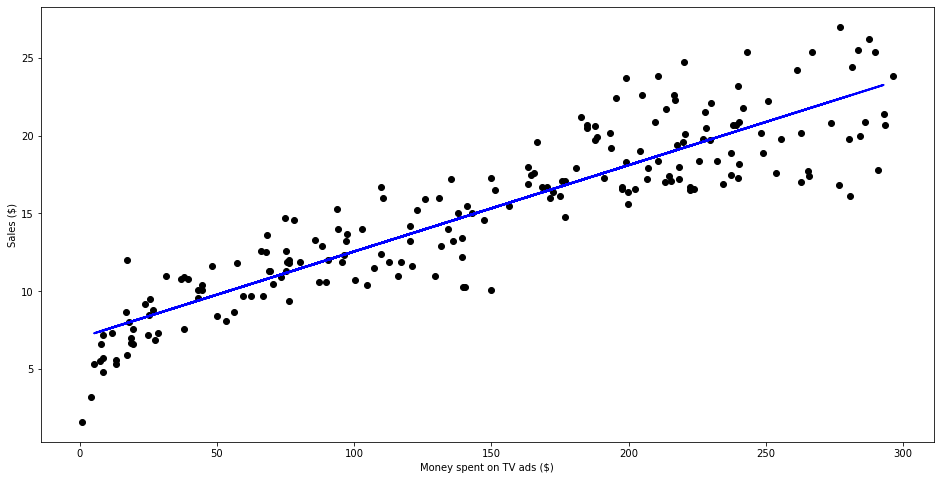

In [50]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [51]:
#Calculating the Coefficients
reg.coef_

array([[0.05548294]])

In [52]:
#Calculating the Intercept
reg.intercept_

array([7.00710843])

In [53]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.802561303423698

Accuracy of model is 80.25%

In [54]:
output = reg.predict([[230.1]])
output

array([[19.77373383]])

In [55]:
# Predicting Sales by inputting values for expenditure on TV advertisment
TV_expen=float(input("Enter amount you want to invest: "))
revenue=(theta[0] + TV_expen * theta[1])*100 #since the sales is in $100s
print("You will get a sales of ${:.2f}".format(revenue))

Enter amount you want to invest: 200
You will get a sales of $1806.78


In [56]:
# Error in prediction
# From the data set at X[50]=199.8 y[50]=1640
y_pred = theta[0]+theta[1]*200
y_org=y[50]
error = abs(y_pred-y_org)*100/y_org
er=error[0]
print("% Error in prediction {:.2f}".format(er),"%")

% Error in prediction 10.17 %


## Linear Regression in multiple variable

In [29]:
#Initializing the variables
X = data.drop(['Sales'], axis=1)
y = data['Sales'].values.reshape(-1,1)

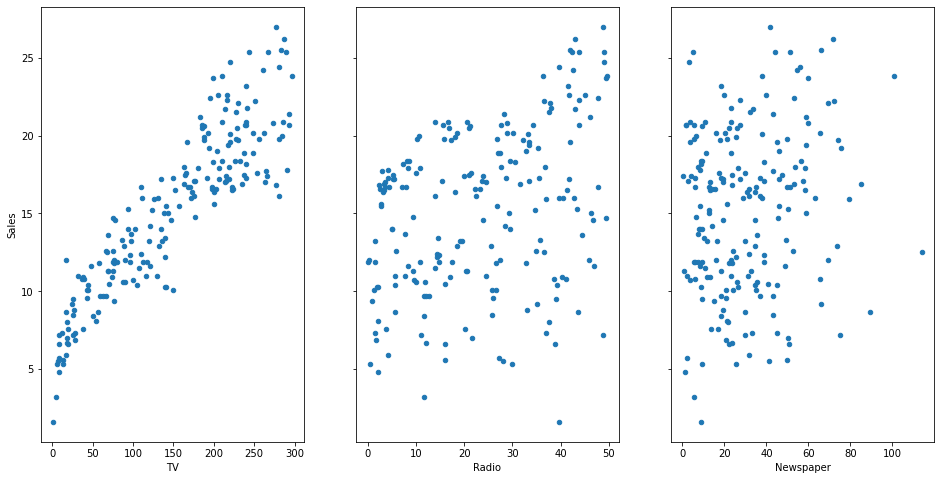

In [40]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

In [30]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [33]:
#Calculating the Coefficients
multiple_reg.coef_

array([[0.05450927, 0.10094536, 0.00433665]])

In [34]:
#Calculating the Intercept
multiple_reg.intercept_

array([4.7141264])

In [35]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9059011844150826

In [36]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

Enter the ammount you will invest on:
TV : 500
Radio : 700
Newspaper : 100


In [38]:
#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get ${:.2f} sales by advertising R${} on TV, ${} on Radio and ${} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

you will get $103.06 sales by advertising R$500.0 on TV, $700.0 on Radio and $100.0 on newspaper.


In [ ]:
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))

# LOOK UP WHAT SAVING MODEL MEANS

### Model Prediction

In [44]:
#prediction on test data
preds=multiple_reg.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [47]:
print(sqrt(mean_squared_error(y_test,preds)))

1.7052146229349228
